In [0]:
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv('../data/mergedData.csv')
df.head()

,Operator,Technology,Test_Type,Data_Speed,Signal_Strength,LSA,Month&Year
0,JIO,4G,upload,0.053033,-63.0,Andhra Pradesh,01/3/18
1,JIO,4G,upload,0.053106,-65.0,Andhra Pradesh,01/3/18
2,JIO,4G,upload,0.050200,-65.0,Andhra Pradesh,01/3/18
3,VODAFONE,4G,download,0.056157,-90.0,Maharashtra,01/3/18
4,VODAFONE,4G,download,0.050272,-90.0,Maharashtra,01/3/18


In [28]:
df1 = df.drop(['Technology', 'Test_Type', 'Signal_Strength', 'LSA', 'Month&Year'], axis=1)
df2 = df.drop(['Operator', 'Test_Type', 'Signal_Strength', 'LSA', 'Month&Year'], axis=1)
df3 = df.drop(['Operator', 'Technology', 'Test_Type', 'Signal_Strength', 'Month&Year'], axis=1)

Label1 = {'AIRCEL': 0, 'AIRTEL': 1, 'CELLONE': 2, 'DOLPHIN': 3, 'IDEA': 4, 'JIO': 5, 'UNINOR': 6,
       'VODAFONE': 7}

Label2 = {'2G': 0, '3G': 1, '4G': 3}

Label3 = {'Andhra Pradesh': 0, 'Assam': 1, 'Bihar': 2, 'Chennai': 3, 'Delhi': 4, 'Gujarat': 5,
       'Haryana': 6, 'Himachal Pradesh': 7, 'Jammu & Kashmir': 8, 'Karnataka': 9,
       'Kerala': 10, 'Kolkata': 11, 'Madhya Pradesh': 12, 'Maharashtra': 13, 'Mumbai': 14,
       'North East': 15, 'Orissa': 16, 'Punjab': 17, 'Rajasthan': 18, 'Tamil Nadu': 19,
       'UP East': 20, 'UP West': 21, 'West Bengal': 21}

df1['Operator'] = df1['Operator'].map(Label1)
df2['Technology'] = df2['Technology'].map(Label2)
df3['LSA'] = df3['LSA'].map(Label3)

print(df1.head()); print()
print(df2.head()); print()
print(df3.head()); print()

   Operator  Data_Speed
0         5    0.053033
1         5    0.053106
2         5    0.050200
3         7    0.056157
4         7    0.050272
()
   Technology  Data_Speed
0           3    0.053033
1           3    0.053106
2           3    0.050200
3           3    0.056157
4           3    0.050272
()
   Data_Speed  LSA
0    0.053033    0
1    0.053106    0
2    0.050200    0
3    0.056157   13
4    0.050272   13
()


In [0]:
def MyDBSCAN(D, eps, MinPts):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # Assign the cluster label to the seed point.
    labels[P] = C
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
       
        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
           labels[Pn] = C
        
        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C
            
            # Find all the neighbors of Pn
            PnNeighborPts = regionQuery(D, Pn, eps)
            
            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched. 
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing                
                #NeighborPts = NeighborPts               
        
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if np.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

In [30]:
#preparing variables for both MyDBSCAN

from sklearn.preprocessing import StandardScaler

X1 = StandardScaler().fit_transform(df1)
X2 = StandardScaler().fit_transform(df2)
X3 = StandardScaler().fit_transform(df3)

X1_DF = pd.DataFrame(X1)
X1_DF.columns = ['P1', 'P2'] 
X2_DF = pd.DataFrame(X2)
X2_DF.columns = ['P1', 'P2']
X3_DF = pd.DataFrame(X3)
X3_DF.columns = ['P1', 'P2']

print(X1_DF.head()); print()
print(X2_DF.head()); print()
print(X3_DF.head()); print()

         P1        P2
0  0.395996 -0.187369
1  0.395996 -0.186748
2  0.395996 -0.211572
3  1.566925 -0.160683
4  1.566925 -0.210951
()
         P1        P2
0  0.306467 -0.187369
1  0.306467 -0.186748
2  0.306467 -0.211572
3  0.306467 -0.160683
4  0.306467 -0.210951
()
         P1        P2
0 -0.187369 -1.734244
1 -0.186748 -1.734244
2 -0.211572 -1.734244
3 -0.160683  0.203546
4 -0.210951  0.203546
()


Running MyDBSCAN and DBSCAN to compare results 

In [33]:
from sklearn import metrics

smpl = df1.sample(frac =.000265)
X1 = smpl.iloc[:,:].values

labels1 = MyDBSCAN(X1,0.5,9)
labels1 = np.array(labels1)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X1, labels1))

Silhouette Coefficient: 0.914


In [34]:
smpl = df2.sample(frac =.000265)
X2 = smpl.iloc[:,:].values

labels2 = MyDBSCAN(X2,0.5,9)
labels2 = np.array(labels2)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X2, labels2))

Silhouette Coefficient: 0.951


In [35]:
smpl = df3.sample(frac =.000265)
X3 = smpl.iloc[:,:].values

labels3 = MyDBSCAN(X3,0.2,9)
labels3 = np.array(labels3)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X3, labels3))

Silhouette Coefficient: 0.903


/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:937: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:937: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:937: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python2.7/dist-packages/matp

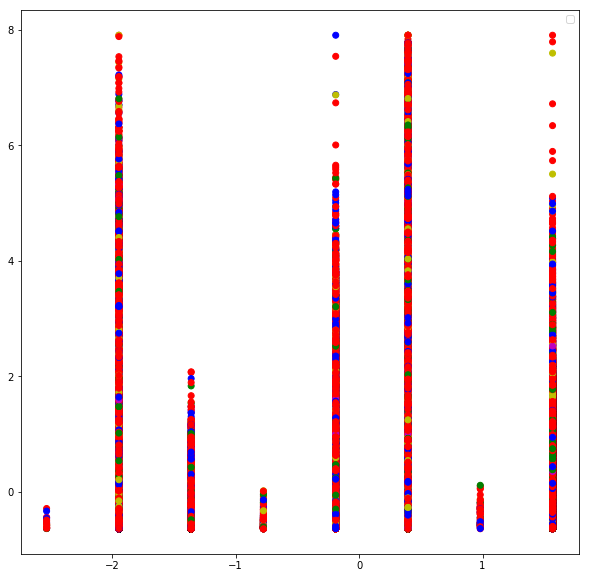

In [45]:
import matplotlib.pyplot as plt

# Building the label to colour mapping 
colours = {} 
colours[1] = 'r'
colours[2] = 'b'
colours[3] = 'g'
colours[4] = 'y'
colours[5] = 'm'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels1] 

# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(10,10)) 
plt.scatter(X1_DF['P1'], X1_DF['P2'],c = cvec)
# Building the legend 
plt.legend(('r', 'b', 'g', 'y', 'm'), ('Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label -1')) 
plt.show()

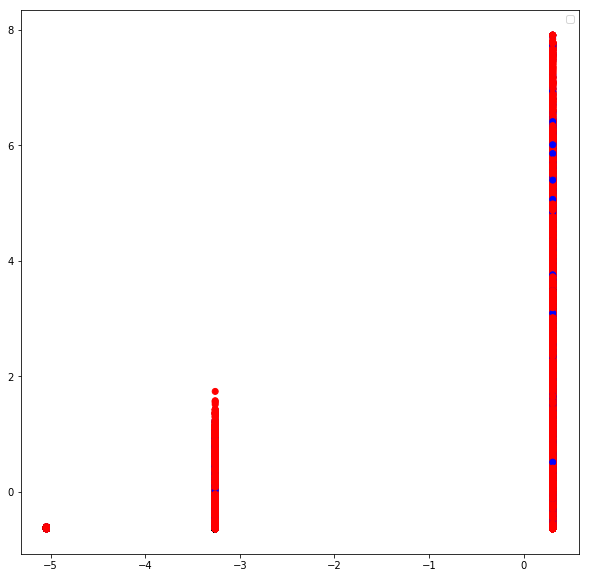

In [46]:
import matplotlib.pyplot as plt

# Building the label to colour mapping 
colours = {} 
colours[1] = 'r'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels2] 

# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(10,10)) 
plt.scatter(X2_DF['P1'], X2_DF['P2'],c = cvec)
# Building the legend 
plt.legend(('r', 'b'), ('Label 1', 'Label 2', 'Label -1')) 
plt.show()